1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import seaborn as sns
import pandas as pd
from scipy.optimize import minimize, curve_fit

Text(0.5, 0, 'y')

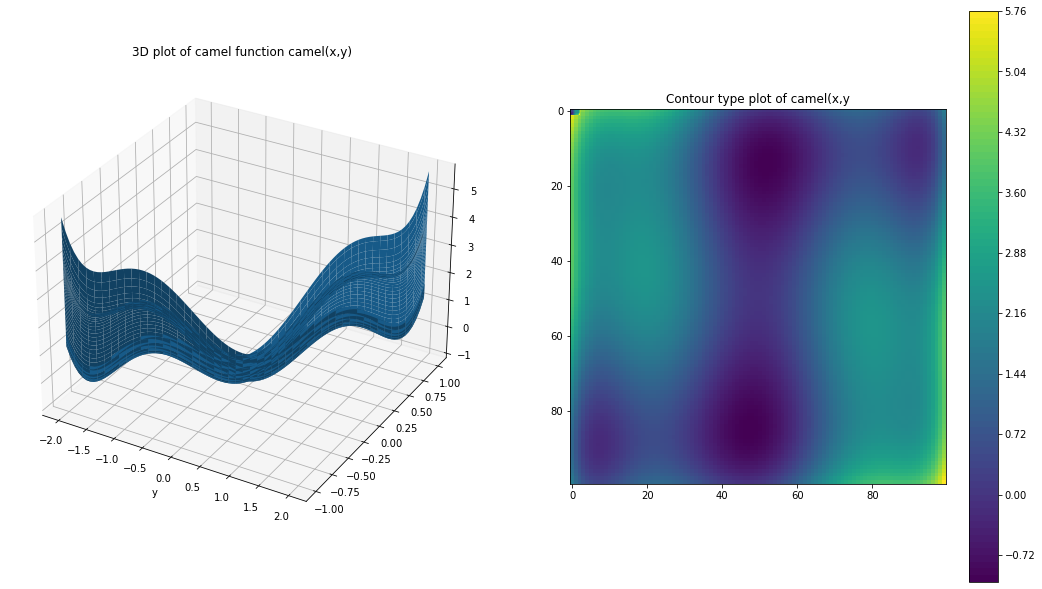

In [3]:


%matplotlib inline
def camel(design_variables): 
    x = design_variables[0]
    y = design_variables[1]
    z = (4-2.1*(x**2)+(x**4)/3)*x**2+x*y+(4*y**2-4)*y**2 
    return z

#variables can be restricted to xE[-2,2] and yE[-1,1]
x = np.linspace(-2, 2, 100)
y = np.linspace(-1,1,100)



#ploting a 3d graph
fig=plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax1=fig.add_subplot(1,2,1, projection='3d')
ax2=fig.add_subplot(1,2,2)

x2, y2 = np.meshgrid(x,y) #creating a 2d grid to be avaluated by f
zz = camel(np.array([x2,y2]))

ax1.plot_surface(x,y,zz)
#plotting a contour function
cs=ax2.contourf(x2,y2,zz,100)
cbar = fig.colorbar(cs)
ax2.imshow(zz)
ax1.set_title("3D plot of camel function camel(x,y)")
ax2.set_title("Contour type plot of camel(x,y")
ax1.set_xlabel("x")
ax1.set_xlabel("y")







In [4]:
#find the global minima - first try
result1 = minimize(camel,np.array([0.,0.]))
print("Minima found starting from the origin:", result1.x)
print(result1.message)


Minima found starting from the origin: [0. 0.]
Optimization terminated successfully.


In [3]:
#trying the POWELL algorithm
result2_powell = minimize(camel,np.array([0.,0.]),method='Powell')
print("Minima found starting from the origin (POWELL ALGORITHM):", result2_powell.x)
print(result2_powell.message)

Minima found starting from the origin (POWELL ALGORITHM): [-0.08984201  0.71265634]
Optimization terminated successfully.


In [4]:
#From the contour plot we will guess some starting points to begin our search for th global minima
starting_points = np.array(((-1.75,0.75),
    (0.,0.75),
    (1.75,0.50),
    (-1.5,-0.5),
    (0.,-0.75),
    (1.75,-0.75)))

results=[]

for i in starting_points:
    # default BFGS
    result=minimize(camel,i) # each result is a OptimizeResult object
    results.append(result.x)
   
    print("\n ------- \n")
    print("Try starting from point: {}".format(i))
    print("Minimum found: {}".format(result.x))
    print(result.message)







 ------- 

Try starting from point: [-1.75  0.75]
Minimum found: [-1.70360666  0.79608374]
Optimization terminated successfully.

 ------- 

Try starting from point: [0.   0.75]
Minimum found: [-0.08984202  0.71265641]
Optimization terminated successfully.

 ------- 

Try starting from point: [1.75 0.5 ]
Minimum found: [-0.08984246  0.71265617]
Optimization terminated successfully.

 ------- 

Try starting from point: [-1.5 -0.5]
Minimum found: [-1.60710511 -0.56865106]
Optimization terminated successfully.

 ------- 

Try starting from point: [ 0.   -0.75]
Minimum found: [ 0.08984201 -0.71265642]
Optimization terminated successfully.

 ------- 

Try starting from point: [ 1.75 -0.75]
Minimum found: [ 1.70360664 -0.79608375]
Optimization terminated successfully.


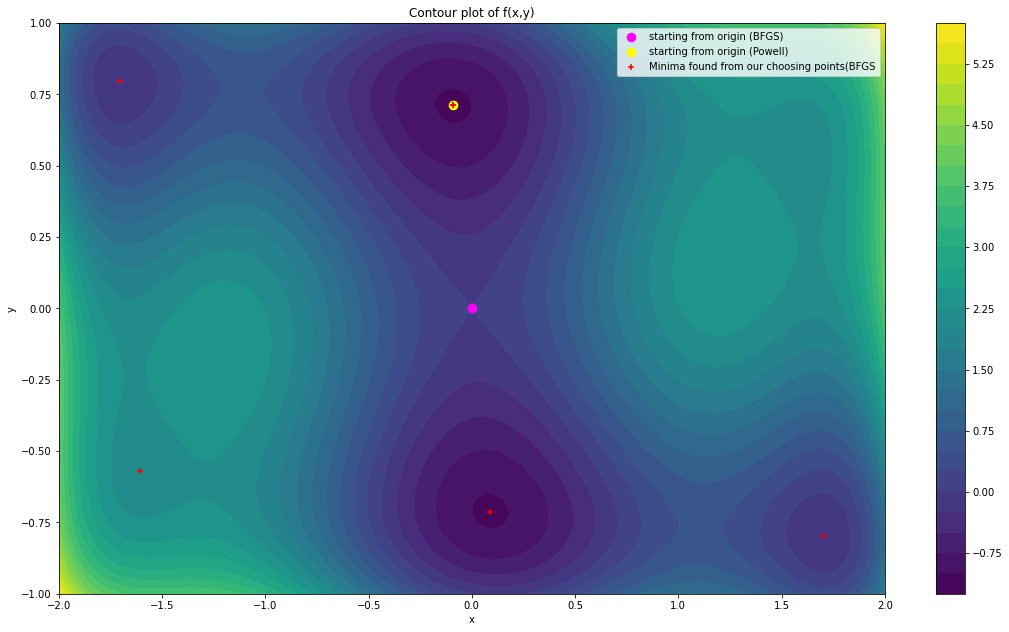

In [134]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax1 = fig.add_subplot()
cs=ax1.contourf(x2,y2,zz,30)
cbar = fig.colorbar(cs)
ax1.set_title("Contour plot of f(x,y)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.scatter(result1.x[0],result1.x[1],color='magenta',s=75,label='starting from origin (BFGS)')
ax1.scatter(result2_powell.x[0],result2_powell.x[1],color='yellow',s=75,label='starting from origin (Powell)')
ax1.scatter(np.array(results)[:,0],np.array(results)[:,1],color='r',marker='+',label='Minima found from our choosing points(BFGS')
ax1.legend()
plt.show()



2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

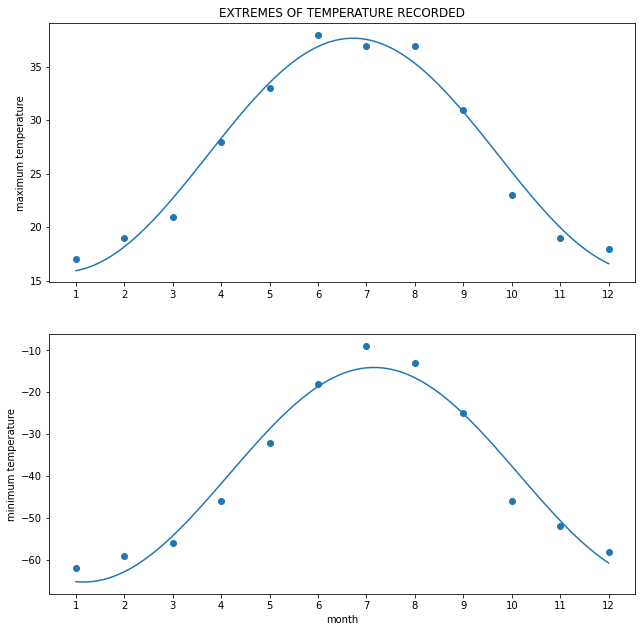

phase shift for maximum temperature = 2.7627793861676233 +- 0.051512395565906643
phase shift for minimum temperature = 2.5362933651124173 +- 0.07059726255610746
Consistent within standard deviation:  False


In [33]:

tempo = list(range(1,13))
max = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(10.5, 10.5, forward=True)
ax1.scatter(tempo, max)
ax1.set_xticks(tempo) 
ax1.set_ylabel('maximum temperature')
ax2.scatter(tempo, min)
ax2.set_xticks(tempo)
ax2.set_ylabel('minimum temperature')
ax1,ax2.set_xlabel('month')
ax1.set_title('EXTREMES OF TEMPERATURE RECORDED')
#A function like f(x)=sin(x) or f(x)=cos(x) could describe the oscilation of temperature
#throughout the months of the year, given the fact that it oscilates periodically.
def cosenoidal(x,A,phi,K):
        return A*np.cos((2*np.pi/12)*x + phi) + K #fix the period to one year
#there are 3 parameters to be discovered:
# The phase amplitude A
# The phase shift phi
# An offset parameter K

#now we set the bounds for our parameters
bounds = (np.array([0.,-np.inf,-np.inf]),np.array([np.inf,np.inf,np.inf]))
# maximum temperature fit
tmax_params,tmax_cov=curve_fit(cosenoidal,tempo,max,bounds=bounds)
x=np.linspace(1,12,100)
ax1.plot(x,cosenoidal(x,*tmax_params))

#minimum temperature fit
tmin_params, tmin_cov=curve_fit(cosenoidal, tempo, min, bounds=bounds)
ax2.plot(x,cosenoidal(x,*tmin_params))
plt.show()

tmax_stds =np.sqrt(np.diag(tmax_cov))
tmin_stds =np.sqrt(np.diag(tmin_cov))

print("phase shift for maximum temperature = {} +- {}".format(tmax_params[1],tmax_stds[1]))
print("phase shift for minimum temperature = {} +- {}".format(tmin_params[1],tmin_stds[1]))
print("Consistent within standard deviation: ",(abs(tmax_params[1]-tmin_params[1])<=(tmax_stds[1]+tmin_stds[1])))



In [14]:
print(tmax_params)
print(tmin_params)

[10.93254952  2.76277939 26.75      ]
[ 25.58169525   2.53629337 -39.66666667]


In [32]:
#A function like f(x)=sin(x) or f(x)=cos(x) could describe the oscilation of temperature
#throughout the months of the year, given the fact that it oscilates periodically.
def cosenoidal(x,A,phi,K):
        return A*np.cos((2*np.pi/12)*x + phi) + K #fix the period to one year
#there are 3 parameters to be discovered:
# The phase amplitude A
# The phase shift phi
# An offset parameter K

#now we set the bounds for our parameters
bounds = (np.array([0.,-np.inf,-np.inf]),np.array([np.inf,np.inf,np.inf]))
# maximum temperature fit
tmax_params,tmax_cov=curve_fit(cosenoidal,tempo,max,bounds=bounds)
x=np.linspace(1,12,100)
ax1.plot(x,cosenoidal(x,*tmax_params),linestyle='--',color='blue',label='Maximum T interpolation')
plt.show()



NameError: name 'tempo' is not defined

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [4]:
! wget -nc https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P ~/data/

File ‘/home/emersonvero/data/residuals_261.pkl’ already there; not retrieving.



[ 4.72247101e+03 -9.15441422e-02  2.79007717e-01  3.07899392e+00]


Text(0.5, 0, 'residuals')

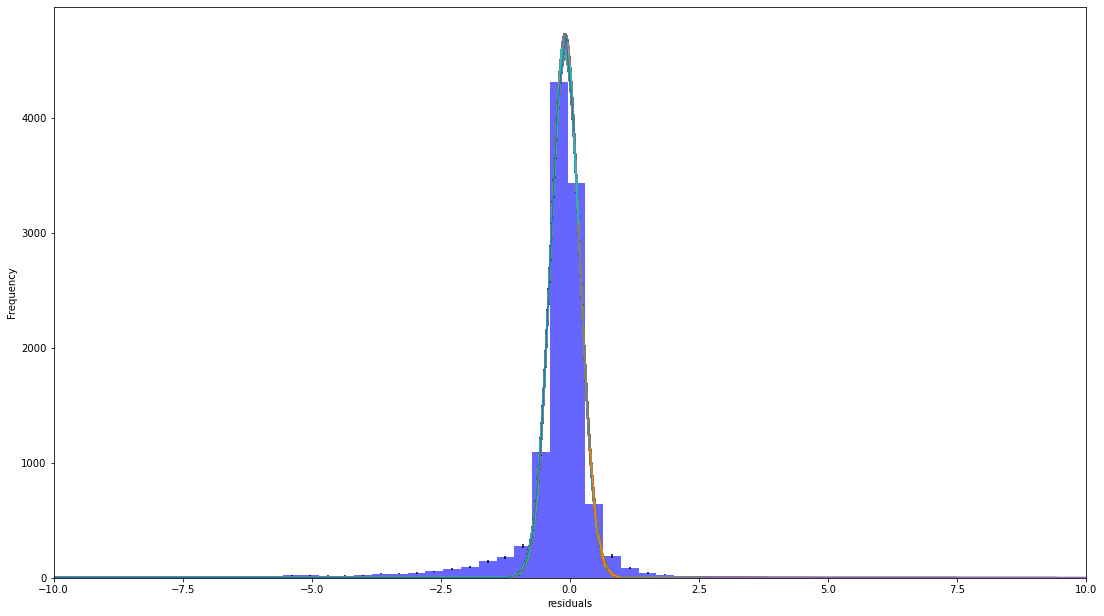

In [5]:
import math
import pickle

with open("/home/emersonvero/data/residuals_261.pkl","rb") as f:
    data = pd.DataFrame(pickle.load(f).item())

n_bins=500
x=data['residuals']


#We choose a gaussian to fit the data

def gaussian(x, a, b, c, d):
    f= a* np.exp(-pow(x-b,2)/(2*pow(c,2)))+d
    return f

fig=plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
data['residuals'].plot(kind='hist', bins=n_bins, alpha=0.6,label='Residuals', color='blue')

y,bin_edges = np.histogram(x,bins=n_bins)
bincenters = 0.5*(bin_edges[1:]+bin_edges[:-1])

yerr=np.sqrt(y)
plt.bar(bincenters,y, width=0, yerr=yerr, align='center')

parameters, covariance_matrix = curve_fit(gaussian, bincenters, y)
print(parameters)

x_range=np.linspace(data['residuals'].min(), data['residuals'], 1000)

plt.plot(x_range, gaussian(x_range,*parameters))
plt.xlim(-10, 10)
plt.xlabel('residuals')

In [16]:
print(len(x_range))

1000


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [6]:
! wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt


--2022-01-14 16:07:26--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2022-01-14 16:07:27--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd39f242c80b8cb760599b8f565.dl.dropboxusercontent.com/cd/0/inline/BdzF2PoJG3dZEU7V2Mg9si0L4WqcHWUQwvRcIrFTwR9wbIbxB5QM5e3hcHmPI4CISrc0o7BGXg62RSVZ_80uUmHoxAylzogOfcrv7yHiFW7D-4mNch11fvjop1Ao5ysRmHWO9Tyy_2o_EO07wyaFES_m/file# [following]
--2022-01-14 16:07:27--  https://ucd39f242c80b8cb760599b8f565.dl.dropboxusercontent.com/

In [16]:
#just find out the path of the file
import os
fname='munich_temperatures_average_with_bad_data.txt'
os.path.isfile(fname)
import os
os.path.abspath(fname)


'/home/emersonvero/repo/LaboratoryOfComputationalPhysics_Y4/munich_temperatures_average_with_bad_data.txt'

In [23]:
data = np.loadtxt('/home/emersonvero/repo/LaboratoryOfComputationalPhysics_Y4/munich_temperatures_average_with_bad_data.txt')
def f1(t,A,b,c):
    return A*np.cos((2*np.pi*t+b))+c

#first fit
first_guess=[25,1.5, 5]
mask = (data[:,0] >= 2008) & (data[:,0] <= 2012)
data1=data[:,0][mask]
data2=data[:,1][mask]
bounds = (np.array([0.,-np.inf,-np.inf]),np.array([np.inf,np.inf,np.inf]))# setting a positive amplitude
first_fit, first_fit_cov = curve_fit(f1, data1, data2, bounds=bounds, p0=first_guess)

first_fit_stds = np.sqrt(np.diag(first_fit_cov))

print( "The results for this first fit are: \n A: {}, b:{}, c: {} ". format(*first_fit))


RSS1 = np.sum((data[:,1][mask] - f1(data[:,0][mask],*first_fit))**2)
TSS1 = np.sum((np.mean(data[:,1][mask])-data[:,1][mask])**2)
print("R^2 = {}".format(1-RSS1/TSS1))


The results for this first fit are: 
 A: 9.988133684179022, b:2.9082450536018674, c: 9.384114873495768 
R^2 = 0.6795934800804343


In [24]:
def f2(t,a,b,c,d):
    return a*np.cos(2*np.pi*b*t + c) + d


#second fit
first_guess=[25,1.5,1, 5]
mask = (data[:,0] >= 2008) & (data[:,0] <= 2012)
data1=data[:,0][mask]
data2=data[:,1][mask]
bounds = (np.array([0.,-np.inf,-np.inf,-np.inf]),np.array([np.inf,np.inf,np.inf,np.inf]))# setting a positive amplitude
second_fit, second_fit_cov = curve_fit(f2, data1, data2, bounds=bounds, p0=first_guess)

second_fit_stds = np.sqrt(np.diag(second_fit_cov))

print( "The results for this first fit are: \n a: {}, b:{}, c: {}, d:{} ". format(*second_fit))


RSS2 = np.sum((data[:,1][mask] - f1(data[:,0][mask],*first_fit))**2)
TSS2 = np.sum((np.mean(data[:,1][mask])-data[:,1][mask])**2)
print("R^2 = {}".format(1-RSS1/TSS1))


The results for this first fit are: 
 a: 2.339866614342796, b:1.376781948556993, c: 1555.9973846174876, d:9.519080710382813 
R^2 = 0.6795934800804343


In [26]:
#Fisher test from the notebook
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    from scipy import stats
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL
degrees_of_freedom_1=2 #parameters - 1
degrees_of_freedom_2=3
Ftest(RSS1,RSS2,degrees_of_freedom_1 , degrees_of_freedom_2,data[:,0].size,verbose=True)

CL: 1.000 , additional parameter necessary: NO


1.0

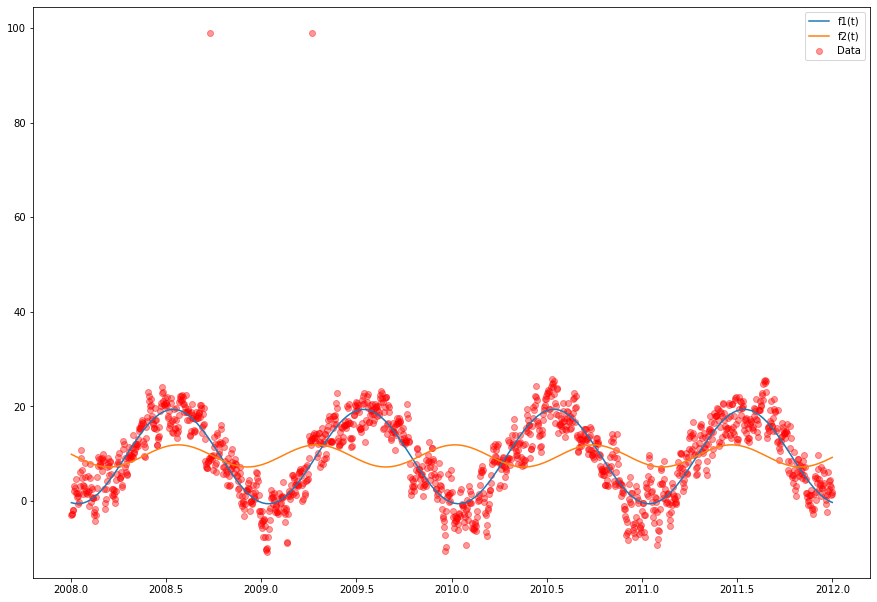

In [35]:
fig,ax=plt.subplots()
fig.set_size_inches(15, 10.5, forward=True)
ax.scatter(data[:,0][mask],data[:,1][mask],color='red', alpha=0.4,label='Data')
x = np.linspace(data[:,0][mask].min(),data[:,0][mask].max(),200) 
ax.plot(x,f1(x,*first_fit),label='f1(t)')
ax.plot(x,f2(x,*second_fit),label='f2(t)')
ax.legend()
plt.show()
